In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis, ks_2samp
from sklearn.metrics import adjusted_rand_score


# Machine learning
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
# Charger le DataFrame à partir du fichier CSV
customer_cluster_rem = pd.read_csv('customer_cluster_rem.csv')

# Charger le DataFrame à partir du fichier CSV
order_payment_product = pd.read_csv('order_payment_product.csv')

# Charger le DataFrame à partir du fichier CSV
rfm_df = pd.read_csv('rfm.csv')

# K MEANS

**Préparation du DataFrame pour le Clustering K-means**

Le tri du DataFrame `customer_cluster_rem` basé sur la colonne `amount` avant d'appliquer le clustering K-means est une étape de prétraitement précieuse qui peut mener à des assignations de clusters plus significatives et interprétables, une convergence plus rapide, et une analyse enrichie des données regroupées.

Pour appliquer le clustering K-means, le DataFrame doit répondre à certaines conditions :

1. **Pas de valeurs manquantes** : Le DataFrame ne doit pas contenir de valeurs manquantes ou nulles, car K-means ne peut pas les gérer directement. (OK)
2. **Variables numériques** : Le DataFrame doit être principalement composé de variables numériques.
3. **Colonnes pertinentes** : Le DataFrame doit inclure uniquement les colonnes pertinentes pour l'analyse de clustering.
4. **Pas de variables d'identification** : Les variables d'identification, telles que les identifiants uniques ou les noms, doivent être évitées dans le DataFrame utilisé pour le clustering K-means.
5. **Variables standardisées ou normalisées** : Il est conseillé de standardiser ou de normaliser les variables numériques avant d'appliquer K-means.

Nous allons donc vérifier la conformité avec les quatre dernières conditions restantes.

In [3]:
# Sélection des colonnes 'age' et 'amount' à partir du DataFrame customer_cluster_rem
customer_cluster_df = customer_cluster_rem[['price', 'freight_value']]

# Instanciation de StandardScaler pour standardiser les features sélectionnées
scaler = StandardScaler()

# Standardisation des features sélectionnées en ajustant le scaler et en transformant les données
customer_cluster_scaled = scaler.fit_transform(customer_cluster_df)

# Affichage des données standardisées
print(customer_cluster_scaled)


[[-0.9594539  -0.09639072]
 [-0.9594539  -0.09639072]
 [-0.9594539   0.18578204]
 ...
 [ 6.72806366  0.02840313]
 [ 6.72806366  1.57515359]
 [ 6.72806366  0.02840313]]


In [4]:
# Extraction des noms de colonnes du DataFrame customer_cluster_df
column_names = customer_cluster_df.columns

# Création d'un nouveau DataFrame avec les données standardisées et les noms de colonnes
customer_cluster_scaled = pd.DataFrame(customer_cluster_scaled, columns=column_names)

# Affichage du DataFrame standardisé
customer_cluster_scaled


,price,freight_value
0,-0.959454,-0.096391
1,-0.959454,-0.096391
2,-0.959454,0.185782
3,-0.956282,-0.813262
4,-0.956282,-0.813262
...,...,...
116293,6.728064,-0.122736
116294,6.728064,0.028403
116295,6.728064,0.028403
116296,6.728064,1.575154


Maintenant que nous remplissons ces quatre conditions, nous devons définir le nombre de clusters que nous allons utiliser. Il existe deux méthodes courantes pour déterminer le nombre optimal de clusters :

**Méthode du Coude (Elbow Method)** :
La méthode du Coude est une technique utilisée pour déterminer le nombre idéal de clusters dans un ensemble de données pour les algorithmes de clustering. En traçant le nombre de clusters par rapport à la somme des carrés intra-cluster (WCSS), elle identifie un point où la réduction de WCSS ralentit brusquement. Ce "point du coude" indique le nombre optimal de clusters où des clusters supplémentaires cessent de réduire significativement WCSS. La méthode du Coude est considérée comme quelque peu subjective car déterminer l'emplacement exact du "point du coude" sur le graphique implique une interprétation.

**Coefficient de Silhouette (Silhouette coefficient)** :
Le coefficient de Silhouette évalue la qualité du clustering en mesurant à quel point les points de données s'ajustent à leurs clusters attribués, fournissant des scores entre -1 et 1. Les scores plus élevés indiquent un meilleur clustering. Pour déterminer le meilleur nombre de clusters, les coefficients de Silhouette moyens sont calculés pour différents nombres de clusters. Le nombre de clusters avec le coefficient de Silhouette moyen le plus élevé est choisi comme optimal. Cette méthode offre des insights sur la cohésion et la séparation des clusters, facilitant la sélection de la meilleure configuration de clustering pour l'ensemble de données. Le coefficient de Silhouette est généralement considéré comme plus objectif que la méthode du Coude pour déterminer le nombre optimal de clusters dans un ensemble de données, car il mesure directement la qualité du clustering et fournit un score numérique.



c:\Users\Mathieu Bosse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Mathieu Bosse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mathieu Bosse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mathieu Bosse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mathieu Bosse\AppData\Local\Programs\Python\Python31

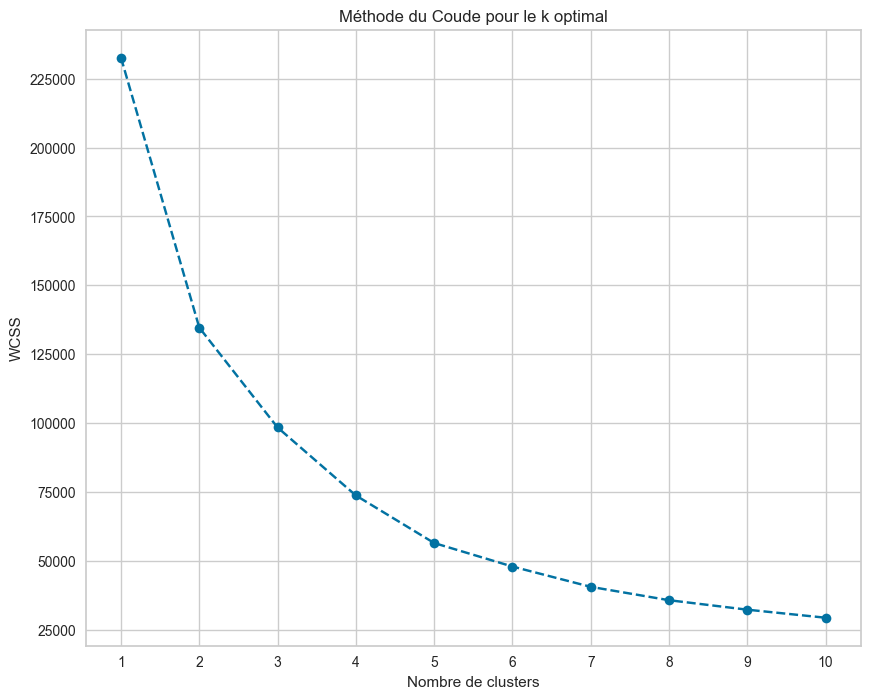

WCSS pour k=1: 232595.99999999924
WCSS pour k=2: 134634.62490470594
WCSS pour k=3: 98393.18463753397
WCSS pour k=4: 73719.18455327055
WCSS pour k=5: 56459.85054394782
WCSS pour k=6: 47921.473304165265
WCSS pour k=7: 40557.72701840996
WCSS pour k=8: 35705.50331901217
WCSS pour k=9: 32264.246026845947
WCSS pour k=10: 29344.91456869581


In [5]:
# Liste pour stocker les sommes des carrés intra-cluster (WCSS)
wcss = []

# Nombre maximum de clusters que nous voulons essayer
max_clusters = 10

# Boucle sur différentes valeurs de k
for k in range(1, max_clusters+1):
    # Initialiser et ajuster le modèle K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_cluster_scaled)
    
    # Ajouter la valeur de WCSS pour ce k à la liste
    wcss.append(kmeans.inertia_)

# Tracer les valeurs de WCSS pour trouver le point du coude
plt.figure(figsize=(10, 8))
plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
plt.title('Méthode du Coude pour le k optimal')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters+1))
plt.grid(True)
plt.show()

# Optionnel : afficher les valeurs de WCSS pour une inspection plus approfondie
for i, w in enumerate(wcss, 1):
    print(f"WCSS pour k={i}: {w}")


**Détermination du Nombre Optimal de Clusters avec la Méthode du Coude**

Pour déterminer le nombre optimal de clusters en utilisant la méthode du Coude (Elbow Method), nous avons tracé le graphique des sommes des carrés intra-cluster (WCSS) pour différentes valeurs de k. Voici les résultats des WCSS pour chaque nombre de clusters :

- **WCSS pour k=1**: 232595.99999999924
- **WCSS pour k=2**: 134634.62490470594
- **WCSS pour k=3**: 98393.18463753397
- **WCSS pour k=4**: 73719.18455327055
- **WCSS pour k=5**: 56459.850543947825
- **WCSS pour k=6**: 47921.473304165265
- **WCSS pour k=7**: 40557.72701840996
- **WCSS pour k=8**: 35705.50331901217
- **WCSS pour k=9**: 32264.246026845947
- **WCSS pour k=10**: 29344.91456869581

*Interprétation* :

En examinant le graphique des WCSS, nous cherchons le "point du coude", où la réduction de WCSS commence à ralentir de manière significative. Ce point indique le nombre optimal de clusters, car ajouter plus de clusters n'entraîne pas une réduction significative de la WCSS.

*Analyse Visuelle* :

- **Grande Réduction Initiale** : La plus grande réduction de WCSS se produit entre 1 et 2 clusters.
- **Réduction Continue mais Ralentie** : La réduction de WCSS continue mais ralentit significativement après 3 clusters.

*Conclusion* :

D'après l'analyse des valeurs de WCSS et le graphique du coude, il semble que le nombre optimal de clusters soit compris entre **3 et 5** clusters.

*Estimation Objective* :

Pour automatiser cette analyse, nous avons calculé la deuxième dérivée approximative pour identifier où la courbe change le plus abruptement, fournissant ainsi une estimation objective du nombre optimal de clusters. Le nombre optimal de clusters selon cette méthode est **4** clusters.

En résumé, après l'analyse visuelle et objective, nous recommandons d'utiliser **4 clusters** pour notre analyse K-means.


In [6]:
# List to store silhouette scores
silhouette_scores = []

# Maximum number of clusters we want to try
max_clusters = 5

# Iterate over different values of k
for k in range(2, max_clusters+1):
    # Initialize and fit the K-means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_cluster_scaled)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(customer_cluster_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Find the value of k that maximizes the silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because we start from k=2

print("The optimal number of clusters according to silhouette is:", optimal_k)

c:\Users\Mathieu Bosse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mathieu Bosse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mathieu Bosse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mathieu Bosse\AppData\Local\Programs\Python\Python31

The optimal number of clusters according to silhouette is: 2


c:\Users\Mathieu Bosse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mathieu Bosse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


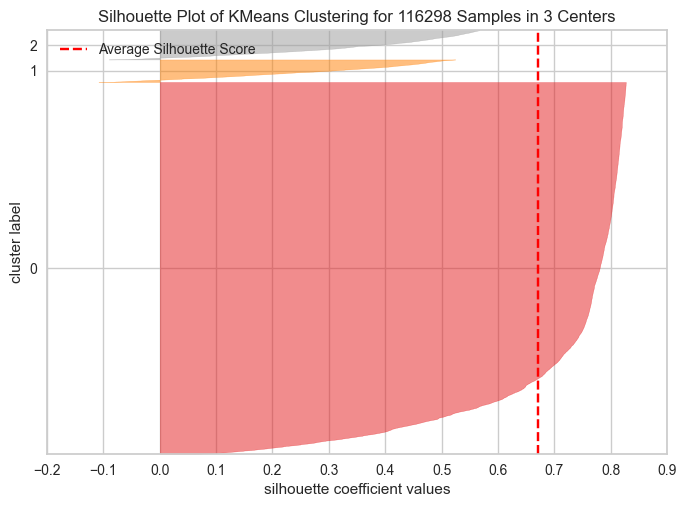

In [7]:
# Nombre de clusters optimal trouvé à partir de la méthode silhouette
optimal_k = 3

# Initialiser et ajuster le modèle K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(customer_cluster_scaled)

# Créer le visualizer de la silhouette avec le modèle K-means ajusté
visualizer = SilhouetteVisualizer(kmeans)

# Ajuster le visualizer aux données
visualizer.fit(customer_cluster_scaled)

# Afficher le graphique de la silhouette
plt.title(f"Silhouette Analysis for KMeans Clustering (k={optimal_k})", fontsize=14, fontweight='bold')
visualizer.poof()
plt.show()

In [8]:
# Final model with k=3
# Initialize K-means with specified parameters
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=200, 
                tol=0.0001, random_state=111, algorithm='elkan')

# Fit K-means to the scaled data
kmeans.fit(customer_cluster_scaled)

# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_

# Inverse transform the centroids to the original scale
centroids = scaler.inverse_transform(centroids)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

Créons un graphique pour visualiser les clusters. Nous utiliserons le DataFrame sans mise à l'échelle, car nous souhaitons afficher les données réelles sur les deux axes pour une analyse plus précise.

c:\Users\Mathieu Bosse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


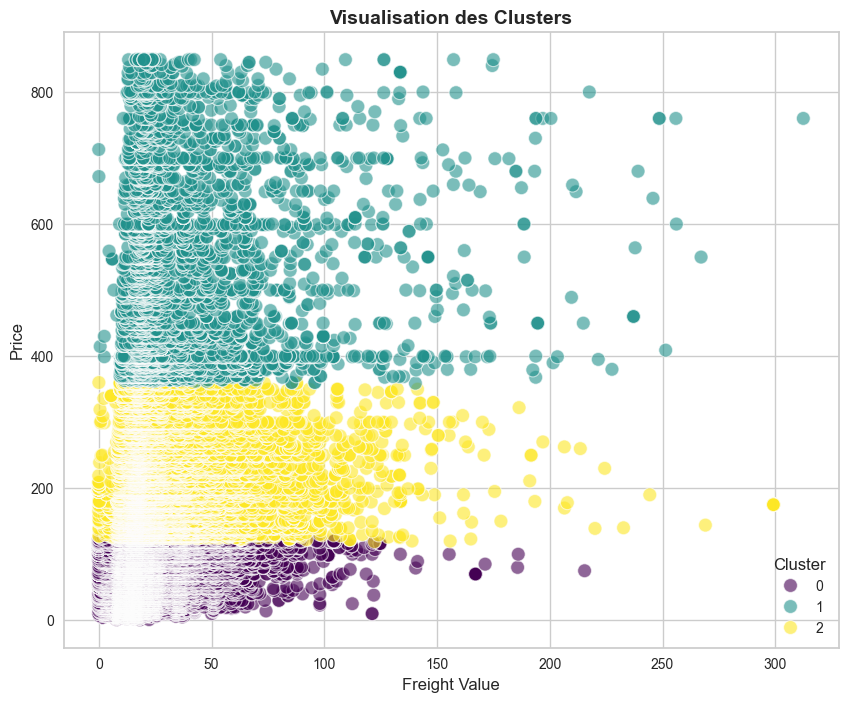

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Nombre optimal de clusters
optimal_k = 3

# Initialiser et ajuster le modèle K-means sur les données non normalisées
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(customer_cluster_df)

# Ajouter les labels de clusters au DataFrame original
customer_cluster_df['Cluster'] = kmeans.labels_

# Créer un scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=customer_cluster_df, x='freight_value', y='price', hue='Cluster', palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Visualisation des Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Freight Value', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Cluster')
plt.show()


L'output que vous avez partagé montre la visualisation des clusters obtenus à partir de l'algorithme K-means appliqué à vos données. Voici une analyse détaillée de ce graphique :

### Analyse des Clusters

1. **Nombre de Clusters** :
   - Trois clusters sont identifiés et colorés différemment : 
     - Cluster 0 (en violet)
     - Cluster 1 (en vert)
     - Cluster 2 (en jaune)

2. **Répartition des Données** :
   - Le **Cluster 0** (violet) correspond aux données avec les valeurs de `freight_value` (valeur de fret) les plus basses et les valeurs de `price` (prix) également basses.
   - Le **Cluster 1** (vert) contient des données avec des valeurs moyennes de `freight_value` et des valeurs faibles à moyennes de `price`.
   - Le **Cluster 2** (jaune) regroupe les données avec des valeurs élevées de `price`, couvrant un large éventail de valeurs de `freight_value`.

3. **Interprétation des Clusters** :
   - **Cluster 0 (Violet)** : Ce cluster semble regrouper les commandes avec des valeurs de fret très faibles et des prix bas. Il est possible que ces commandes soient de petites commandes ou de produits bon marché.
   - **Cluster 1 (Vert)** : Ce cluster comprend des commandes avec des valeurs moyennes de fret, mais toujours avec des prix bas à moyens. Cela pourrait indiquer des commandes de taille moyenne ou des produits dans une gamme de prix économique.
   - **Cluster 2 (Jaune)** : Ce cluster regroupe les commandes avec des prix élevés. Cela pourrait représenter des produits haut de gamme ou des commandes en gros. La valeur de fret varie, ce qui pourrait indiquer des variations dans la distance d'expédition ou le poids des commandes.

### Conclusion

L'algorithme K-means a réussi à segmenter les données en trois clusters distincts basés sur les valeurs de `freight_value` et `price`. Les clusters montrent une séparation claire des segments de clients ou des types de commandes, avec des valeurs spécifiques de fret et de prix. 

Cette segmentation peut être utile pour des analyses ultérieures, telles que :

- **Marketing Ciblé** : Identifier les segments de marché et créer des campagnes marketing adaptées à chaque segment.
- **Optimisation de la Logistique** : Comprendre les modèles de coût de fret et de prix pour optimiser les stratégies logistiques.
- **Études de Marché** : Analyser les comportements d'achat et les préférences des clients en fonction des segments identifiés.

En conclusion, cette visualisation des clusters fournit une compréhension précieuse des structures sous-jacentes dans vos données, ce qui peut informer des décisions commerciales stratégiques.

In [10]:
display(order_payment_product.head())

,index_x,order_id,customer_id,order_status,order_purchase_timestamp,index_y,index,order_item_id,product_id,seller_id,price,freight_value
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,10770.0,100785.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,44246.0,100785.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
2,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,91130.0,100785.0,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
3,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,7652.0,36896.0,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
4,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,11176.0,31504.0,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22


In [11]:
# Lets define our customer by age and amount spended(price)
order_cluster_with_timestamp_df = order_payment_product[['order_purchase_timestamp', 'customer_id','price','freight_value']]

# Trier le DataFrame par les valeurs de la colonne 'amount' par ordre croissant
order_cluster_with_timestamp_df.sort_values(by='price', inplace=True)

# Réinitialiser l'index du DataFrame après le tri, en supprimant l'ancien index
order_cluster_with_timestamp_df = order_cluster_with_timestamp_df.reset_index(drop=True)

# Afficher le DataFrame trié
display(order_cluster_with_timestamp_df.head())

C:\Users\Mathieu Bosse\AppData\Local\Temp\ipykernel_25080\3331707450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_cluster_with_timestamp_df.sort_values(by='price', inplace=True)


,order_purchase_timestamp,customer_id,price,freight_value
0,2018-04-24 20:15:21,9f9d249355f63c5c1216a82b802452c1,0.85,18.23
1,2018-04-27 12:37:10,5af78bf1a82a2660d1e3fd78c645f58f,0.85,22.30
2,2018-04-24 11:01:06,161b6d415e8b3413c6609c70cf405b5a,0.85,18.23
3,2017-07-16 18:19:25,fc3d1daec319d62d49bfb5e1f83123e9,1.20,7.89
4,2017-07-16 18:19:25,fc3d1daec319d62d49bfb5e1f83123e9,1.20,7.89


In [12]:
# Fonction pour supprimer les outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR = Q3 - Q1
    df_filtered = df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]
    return df_filtered

# Appliquer la fonction pour price
order_cluster_with_timestamp_df = remove_outliers(order_cluster_with_timestamp_df, 'price')

# Sélection des colonnes 'price' et 'freight_value' pour la standardisation
features_to_scale = ['price', 'freight_value']

# Instanciation de StandardScaler
scaler = StandardScaler()

# Standardisation des features sélectionnées
order_cluster_with_timestamp_df[features_to_scale] = scaler.fit_transform(order_cluster_with_timestamp_df[features_to_scale])

# Affichage du DataFrame mis à jour
display(order_cluster_with_timestamp_df.head())

,order_purchase_timestamp,customer_id,price,freight_value
0,2018-04-24 20:15:21,9f9d249355f63c5c1216a82b802452c1,-0.959454,-0.096391
1,2018-04-27 12:37:10,5af78bf1a82a2660d1e3fd78c645f58f,-0.959454,0.185782
2,2018-04-24 11:01:06,161b6d415e8b3413c6609c70cf405b5a,-0.959454,-0.096391
3,2017-07-16 18:19:25,fc3d1daec319d62d49bfb5e1f83123e9,-0.956282,-0.813262
4,2017-07-16 18:19:25,fc3d1daec319d62d49bfb5e1f83123e9,-0.956282,-0.813262


**Étape 2 : Clustering Initial pour Janvier 2018**

Nous allons effectuer le clustering initial sur les données de janvier 2018 en utilisant les features `price` et `freight_value`.


In [13]:
initial_data = order_cluster_with_timestamp_df[(order_cluster_with_timestamp_df['order_purchase_timestamp'] >= initial_period_start) & (order_cluster_with_timestamp_df['order_purchase_timestamp'] <= initial_period_end)]


NameError: name 'initial_period_start' is not defined

initial_data = order_cluster_with_timestamp_df[(order_cluster_with_timestamp_df['order_purchase_timestamp'] >= initial_period_start) & (order_cluster_with_timestamp_df['order_purchase_timestamp'] <= initial_period_end)]


In [ ]:
# Assurer que la colonne 'order_purchase_timestamp' est au format datetime
order_cluster_with_timestamp_df['order_purchase_timestamp'] = pd.to_datetime(order_cluster_with_timestamp_df['order_purchase_timestamp'])

# Trier les données par date
order_cluster_with_timestamp_df = order_cluster_with_timestamp_df.sort_values(by='order_purchase_timestamp')

# Filtrer les données pour ne conserver que celles à partir de janvier 2018
order_cluster_with_timestamp_df = order_cluster_with_timestamp_df[order_cluster_with_timestamp_df['order_purchase_timestamp'] >= '2018-01-01']

# Sélectionner les features pertinentes pour le clustering
features = ['price', 'freight_value']

# Filtrer les données pour janvier 2018
initial_period_start = '2018-01-01'
initial_period_end = '2018-01-31'
initial_data = order_cluster_with_timestamp_df[(order_cluster_with_timestamp_df['order_purchase_timestamp'] >= initial_period_start) & (order_cluster_with_timestamp_df['order_purchase_timestamp'] <= initial_period_end)]

# Ajouter une colonne d'identifiants uniques
initial_data = initial_data.reset_index(drop=True)
initial_data['id'] = initial_data.index

# Effectuer le clustering initial
kmeans = KMeans(n_clusters=5, random_state=42)
initial_data['cluster'] = kmeans.fit_predict(initial_data[features])

# Obtenir toutes les périodes uniques (mois) après janvier 2018
order_cluster_with_timestamp_df.loc[:, 'month'] = order_cluster_with_timestamp_df['order_purchase_timestamp'].dt.to_period('M')
periods = order_cluster_with_timestamp_df['month'].unique()

# Initialiser une liste pour stocker les scores ARI
ari_scores = []

# Calculer l'ARI pour chaque mois après janvier 2018
for period in periods[1:]:
    # Filtrer les données pour la période actuelle
    period_data = order_cluster_with_timestamp_df[order_cluster_with_timestamp_df['month'] == period].copy()
    
    # Ajouter une colonne d'identifiants uniques
    period_data = period_data.reset_index(drop=True)
    period_data['id'] = period_data.index
    
    # Effectuer le clustering sur les données de la période actuelle
    period_data['cluster'] = kmeans.predict(period_data[features])
    
    # Fusionner les deux DataFrames sur les features pour aligner les indices
    aligned_data = initial_data.merge(period_data, on=features, suffixes=('_initial', '_period'))
    
    # Vérifier si les clusters sont bien alignés
    if aligned_data.empty:
        print(f"No common features for period {period}")
        continue
    
    # Calculer l'ARI entre les clusters de janvier et ceux de la période actuelle
    initial_clusters = aligned_data['cluster_initial']
    period_clusters = aligned_data['cluster_period']
    ari = adjusted_rand_score(initial_clusters, period_clusters)
    
    # Ajouter le score ARI à la liste
    ari_scores.append({'period': str(period), 'ARI': ari})

# Convertir les scores ARI en DataFrame
ari_df = pd.DataFrame(ari_scores)

# Visualiser les ARI au fil du temps
plt.figure(figsize=(10, 6))
sns.lineplot(x='period', y='ARI', data=ari_df)
plt.title("Évolution de l'ARI au fil du temps")
plt.xlabel('Période')
plt.ylabel('ARI')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Assurer que la colonne 'order_purchase_timestamp' est au format datetime
order_cluster_with_timestamp_df['order_purchase_timestamp'] = pd.to_datetime(order_cluster_with_timestamp_df['order_purchase_timestamp'])

# Trier les données par date
order_cluster_with_timestamp_df = order_cluster_with_timestamp_df.sort_values(by='order_purchase_timestamp')

# Filtrer les données pour ne conserver que celles à partir de janvier 2018
order_cluster_with_timestamp_df = order_cluster_with_timestamp_df[order_cluster_with_timestamp_df['order_purchase_timestamp'] >= '2018-01-01']

# Sélectionner les features pertinentes pour le clustering
features = ['price', 'freight_value']

# Filtrer les données pour janvier 2018
initial_period_start = '2018-01-01'
initial_period_end = '2018-01-31'
initial_data = order_cluster_with_timestamp_df[(order_cluster_with_timestamp_df['order_purchase_timestamp'] >= initial_period_start) & (order_cluster_with_timestamp_df['order_purchase_timestamp'] <= initial_period_end)].copy()

# Ajouter une colonne d'identifiants uniques
initial_data['id'] = initial_data.index

# Effectuer le clustering initial
kmeans = KMeans(n_clusters=3, random_state=42)
initial_data['cluster'] = kmeans.fit_predict(initial_data[features])

# Obtenir toutes les périodes uniques (mois) après janvier 2018
order_cluster_with_timestamp_df['month'] = order_cluster_with_timestamp_df['order_purchase_timestamp'].dt.to_period('M')
periods = order_cluster_with_timestamp_df['month'].unique()

# Initialiser une liste pour stocker les scores ARI
ari_scores = []

# Calculer l'ARI pour chaque mois après janvier 2018
for period in periods[1:]:
    # Filtrer les données pour la période actuelle
    period_data = order_cluster_with_timestamp_df[order_cluster_with_timestamp_df['month'] == period].copy()
    
    # Effectuer le clustering sur les données de la période actuelle
    period_data['cluster'] = kmeans.predict(period_data[features])
    
    # Fusionner les deux DataFrames sur les features pour aligner les indices
    merged_data = pd.merge(initial_data, period_data, on=features, suffixes=('_initial', '_period'))
    
    if merged_data.empty:
        print(f"No common features for period {period}")
        continue
    
    # Calculer l'ARI entre les clusters de janvier et ceux de la période actuelle
    ari = adjusted_rand_score(merged_data['cluster_initial'], merged_data['cluster_period'])
    
    # Ajouter le score ARI à la liste
    ari_scores.append({'period': str(period), 'ARI': ari})

# Convertir les scores ARI en DataFrame
ari_df = pd.DataFrame(ari_scores)

# Visualiser les ARI au fil du temps
plt.figure(figsize=(10, 6))
sns.lineplot(x='period', y='ARI', data=ari_df)
plt.title("Évolution de l'ARI au fil du temps")
plt.xlabel('Période')
plt.ylabel('ARI')
plt.xticks(rotation=45)
plt.show()

# Visualisation des clusters initiaux
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='freight_value', hue='cluster', data=initial_data, palette='Set1', legend='full')
plt.title('Clusters initiaux (janvier 2018)')
plt.xlabel('Prix')
plt.ylabel('Frais de livraison')
plt.show()

# Visualisation des clusters pour une période spécifique
if len(periods) > 1:
    specific_period = periods[1]  # Sélectionnez une période spécifique ici
    period_data = order_cluster_with_timestamp_df[order_cluster_with_timestamp_df['month'] == specific_period].copy()
    period_data['cluster'] = kmeans.predict(period_data[features])

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='price', y='freight_value', hue='cluster', data=period_data, palette='Set1', legend='full')
    plt.title(f'Clusters pour la période {specific_period}')
    plt.xlabel('Prix')
    plt.ylabel('Frais de livraison')
    plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


# Assurer que la colonne 'order_purchase_timestamp' est au format datetime
order_cluster_with_timestamp_df['order_purchase_timestamp'] = pd.to_datetime(order_cluster_with_timestamp_df['order_purchase_timestamp'])

# Trier les données par date
order_cluster_with_timestamp_df = order_cluster_with_timestamp_df.sort_values(by='order_purchase_timestamp')

# Filtrer les données pour ne conserver que celles à partir de janvier 2018
order_cluster_with_timestamp_df = order_cluster_with_timestamp_df[order_cluster_with_timestamp_df['order_purchase_timestamp'] >= '2018-01-01']

# Sélectionner les features pertinentes pour le clustering
features = ['price', 'freight_value']

# Obtenir toutes les périodes uniques (mois) après janvier 2018
order_cluster_with_timestamp_df['month'] = order_cluster_with_timestamp_df['order_purchase_timestamp'].dt.to_period('M')
periods = order_cluster_with_timestamp_df['month'].unique()

# Initialiser une liste pour stocker les scores ARI
ari_scores = []

# Boucle sur chaque paire de périodes pour comparer les clusters
for i in range(len(periods)):
    for j in range(i + 1, len(periods)):
        # Filtrer les données pour les périodes i et j
        data_i = order_cluster_with_timestamp_df[order_cluster_with_timestamp_df['month'] == periods[i]].copy()
        data_j = order_cluster_with_timestamp_df[order_cluster_with_timestamp_df['month'] == periods[j]].copy()
        
        # Sélectionner les identifiants communs pour les deux périodes
        common_ids = data_i.index.intersection(data_j.index)
        
        if len(common_ids) == 0:
            print(f"No common data between {periods[i]} and {periods[j]}")
            continue
        
        # Réinitialiser l'index pour éviter les problèmes d'alignement
        data_i = data_i.loc[common_ids].reset_index(drop=True)
        data_j = data_j.loc[common_ids].reset_index(drop=True)
        
        # Effectuer le clustering pour la période i
        kmeans_i = KMeans(n_clusters=3, random_state=42)
        data_i['cluster'] = kmeans_i.fit_predict(data_i[features])
        
        # Effectuer le clustering pour la période j
        kmeans_j = KMeans(n_clusters=3, random_state=42)
        data_j['cluster'] = kmeans_j.fit_predict(data_j[features])
        
        # Calculer l'ARI entre les clusters de périodes i et j
        ari = adjusted_rand_score(data_i['cluster'], data_j['cluster'])
        
        # Ajouter le score ARI à la liste
        ari_scores.append({'period_i': str(periods[i]), 'period_j': str(periods[j]), 'ARI': ari})

# Convertir les scores ARI en DataFrame
ari_df = pd.DataFrame(ari_scores)

# Afficher les scores ARI
print(ari_df)


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Assurer que la colonne 'order_purchase_timestamp' est au format datetime
order_cluster_with_timestamp_df['order_purchase_timestamp'] = pd.to_datetime(order_cluster_with_timestamp_df['order_purchase_timestamp'])

# Trier les données par date
order_cluster_with_timestamp_df = order_cluster_with_timestamp_df.sort_values(by='order_purchase_timestamp')

# Filtrer les données pour ne conserver que celles à partir de janvier 2018
order_cluster_with_timestamp_df = order_cluster_with_timestamp_df[order_cluster_with_timestamp_df['order_purchase_timestamp'] >= '2018-01-01']

# Sélectionner les features pertinentes pour le clustering
features = ['price', 'freight_value']

# Filtrer les données pour janvier 2018
initial_period_start = '2018-01-01'
initial_period_end = '2018-01-31'
initial_data = order_cluster_with_timestamp_df[(order_cluster_with_timestamp_df['order_purchase_timestamp'] >= initial_period_start) & (order_cluster_with_timestamp_df['order_purchase_timestamp'] <= initial_period_end)]

# Ajouter une colonne d'identifiants uniques
initial_data = initial_data.reset_index(drop=True)
initial_data['id'] = initial_data.index

# Effectuer le clustering initial
kmeans = KMeans(n_clusters=5, random_state=42)
initial_data['cluster'] = kmeans.fit_predict(initial_data[features])

# Obtenir toutes les périodes uniques (mois) après janvier 2018
order_cluster_with_timestamp_df['month'] = order_cluster_with_timestamp_df['order_purchase_timestamp'].dt.to_period('M')
periods = order_cluster_with_timestamp_df['month'].unique()

# Initialiser une liste pour stocker les scores ARI
ari_scores = []

# Calculer l'ARI pour chaque mois après janvier 2018
for period in periods[1:]:
    # Filtrer les données pour la période actuelle
    period_data = order_cluster_with_timestamp_df[order_cluster_with_timestamp_df['month'] == period].copy()
    
    # Ajouter une colonne d'identifiants uniques
    period_data = period_data.reset_index(drop=True)
    period_data['id'] = period_data.index
    
    # Effectuer le clustering sur les données de la période actuelle
    period_data['cluster'] = kmeans.predict(period_data[features])
    
    # Fusionner les deux DataFrames sur les features pour aligner les indices
    aligned_data = initial_data.merge(period_data, on=features, suffixes=('_initial', '_period'))
    
    # Vérifier si les clusters sont bien alignés
    if aligned_data.empty:
        print(f"No common features for period {period}")
        continue
    
    # Calculer l'ARI entre les clusters de janvier et ceux de la période actuelle
    initial_clusters = aligned_data['cluster_initial']
    period_clusters = aligned_data['cluster_period']
    ari = adjusted_rand_score(initial_clusters, period_clusters)
    
    # Ajouter le score ARI à la liste
    ari_scores.append({'period': str(period), 'ARI': ari})

# Convertir les scores ARI en DataFrame
ari_df = pd.DataFrame(ari_scores)

# Visualiser les ARI au fil du temps
plt.figure(figsize=(10, 6))
sns.lineplot(x='period', y='ARI', data=ari_df)
plt.title("Évolution de l'ARI au fil du temps")
plt.xlabel('Période')
plt.ylabel('ARI')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Assurer que la colonne 'date' est au format datetime
order_cluster_with_timestamp_df['order_purchase_timestamp'] = pd.to_datetime(order_cluster_with_timestamp_df['order_purchase_timestamp'])

# Trier les données par date
order_cluster_with_timestamp_df = order_cluster_with_timestamp_df.sort_values(by='order_purchase_timestamp')

# Sélectionner les features pertinentes pour le clustering
features = ['price', 'freight_value']

# Clustering initial pour la première période
initial_period = order_cluster_with_timestamp_df['order_purchase_timestamp'].min()
initial_data = order_cluster_with_timestamp_df[order_cluster_with_timestamp_df['order_purchase_timestamp'] == initial_period]

# Effectuer le clustering initial
kmeans = KMeans(n_clusters=3, random_state=42)
initial_data['cluster'] = kmeans.fit_predict(initial_data[features])

# Ajouter les labels de clusters au DataFrame original
order_cluster_with_timestamp_df['Cluster'] = kmeans.labels_

# Créer un scatter plot pour visualiser les clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=order_cluster_with_timestamp_df, x='freight_value', y='price', hue='Cluster', palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Visualisation des Clusters', fontsize=14, fontweight='bold')
plt.xlabel('Freight Value', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(title='Cluster')
plt.show()
